<a href="https://colab.research.google.com/github/marcelo-it/fraudes-financeiras-isolation-forest/blob/dev/fraudes_financeiras_isolation_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conjunto de Dados**

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import hashlib
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/fraudes-financeiras-isolation-forest/dataset-original.csv');

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191293 entries, 0 to 2191292
Data columns (total 19 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   ID_CLIENTE                    int64  
 1   MONTH                         int64  
 2   CLASSIFICACAO                 object 
 3   RAZAO_SOCIAL                  object 
 4   CNAE                          object 
 5   STATUS                        object 
 6   DT_CADASTRO                   object 
 7   DT_FUNDACAO                   object 
 8   ENDERECO                      object 
 9   BAIRRO                        object 
 10  CIDADE                        object 
 11  UF                            object 
 12  CEP                           float64
 13  QTD_CONSULTAS                 int64  
 14  MAIOR_ACUMULO                 float64
 15  QTD_ASSOCIADAS_MAIOR_ACUMULO  float64
 16  DEBITO_ATUAL                  float64
 17  QTD_ASSOCIADAS_DEBITO_ATUAL   float64
 18  DATA_ULTIMA_COMPRA    

In [ ]:
#Ajustando nomes das variáveis
data = data.rename(columns={'ID_CLIENTE': 'CNPJ'})
data = data.rename(columns={'CLASSIFICACAO': 'RATING'})
data = data.rename(columns={'MONTH': 'DT_INFORMACAO'})
data = data.rename(columns={'DATA_ULTIMA_COMPRA': 'DT_ULTIMA_COMPRA2'})
data = data.rename(columns={'DT_CADASTRO': 'DT_CADASTRO2'})
data = data.rename(columns={'DT_FUNDACAO': 'DT_FUNDACAO2'})

In [ ]:
data.head(5)

,CNPJ,DT_INFORMACAO,RATING,RAZAO_SOCIAL,CNAE,STATUS,DT_CADASTRO2,DT_FUNDACAO2,ENDERECO,BAIRRO,CIDADE,UF,CEP,QTD_CONSULTAS,MAIOR_ACUMULO,QTD_ASSOCIADAS_MAIOR_ACUMULO,DEBITO_ATUAL,QTD_ASSOCIADAS_DEBITO_ATUAL,DT_ULTIMA_COMPRA2
0,382108,2,D,BANCO DO BRASIL SA,203-8,ATIVA,1999-01-19,1991-04-25,AV CEL JOSE SOARES MARCONDES,JARDIM BONGIOVANI,PRESIDENTE PRUDENTE,SP,19050230.0,4,50919498.38,12.0,23781257.23,7.0,2025-02-27
1,382108,3,C,BANCO DO BRASIL SA,203-8,ATIVA,1999-01-19,1991-04-25,AV CEL JOSE SOARES MARCONDES,JARDIM BONGIOVANI,PRESIDENTE PRUDENTE,SP,19050230.0,1,50919088.96,11.0,24708162.77,6.0,2025-03-27
2,382108,5,D,BANCO DO BRASIL SA,2038,ATIVA,1999-01-19,1991-04-25,AV CEL JOSE SOARES MARCONDES,JARDIM BONGIOVANI,PRESIDENTE PRUDENTE,SP,19050230.0,1,75110064.88,13.0,37793130.22,10.0,2024-05-28
3,382108,6,C,BANCO DO BRASIL SA,2038,ATIVA,1999-01-19,1991-04-25,AV CEL JOSE SOARES MARCONDES,JARDIM BONGIOVANI,PRESIDENTE PRUDENTE,SP,19050230.0,1,60779630.00,11.0,32958037.23,8.0,2024-06-26
4,382108,7,C,BANCO DO BRASIL SA,2038,ATIVA,1999-01-19,1991-04-25,AV CEL JOSE SOARES MARCONDES,JARDIM BONGIOVANI,PRESIDENTE PRUDENTE,SP,19050230.0,3,52137216.34,11.0,25177567.24,7.0,2024-07-29


In [ ]:
# Converte os nomes das colunas para letras minúsculas
data.columns = data.columns.str.lower()

In [ ]:
# Aplicar strip() e lower() em todas as colunas de texto
data = data.apply(lambda col: col.str.strip().str.lower() if col.dtype == "object" else col)
data.head(5)

,cnpj,dt_informacao,rating,razao_social,cnae,status,dt_cadastro2,dt_fundacao2,endereco,bairro,cidade,uf,cep,qtd_consultas,maior_acumulo,qtd_associadas_maior_acumulo,debito_atual,qtd_associadas_debito_atual,dt_ultima_compra2
0,382108,2,d,banco do brasil sa,203-8,ativa,1999-01-19,1991-04-25,av cel jose soares marcondes,jardim bongiovani,presidente prudente,sp,19050230.0,4,50919498.38,12.0,23781257.23,7.0,2025-02-27
1,382108,3,c,banco do brasil sa,203-8,ativa,1999-01-19,1991-04-25,av cel jose soares marcondes,jardim bongiovani,presidente prudente,sp,19050230.0,1,50919088.96,11.0,24708162.77,6.0,2025-03-27
2,382108,5,d,banco do brasil sa,2038,ativa,1999-01-19,1991-04-25,av cel jose soares marcondes,jardim bongiovani,presidente prudente,sp,19050230.0,1,75110064.88,13.0,37793130.22,10.0,2024-05-28
3,382108,6,c,banco do brasil sa,2038,ativa,1999-01-19,1991-04-25,av cel jose soares marcondes,jardim bongiovani,presidente prudente,sp,19050230.0,1,60779630.00,11.0,32958037.23,8.0,2024-06-26
4,382108,7,c,banco do brasil sa,2038,ativa,1999-01-19,1991-04-25,av cel jose soares marcondes,jardim bongiovani,presidente prudente,sp,19050230.0,3,52137216.34,11.0,25177567.24,7.0,2024-07-29


In [ ]:
# Renomear e converter datas
data = data.rename(columns={'cnpj': 'customerID'})

data = data.rename(columns={'dt_informacao': 'updated'})

data = data.rename(columns={'razao_social': 'name'})

data = data.rename(columns={'endereco': 'address'})

data = data.rename(columns={'bairro': 'neighborhood'})

data = data.rename(columns={'cidade': 'city'})

data = data.rename(columns={'uf': 'state'})

data = data.rename(columns={'cep': 'zipCode'})

data = data.rename(columns={'qtd_consultas': 'queries'})

# Convert 'DT_FUNDACAO' to datetime objects, handling errors
data['dt_fundacao2'] = pd.to_datetime(data['dt_fundacao2'], errors='coerce').dt.normalize()
data = data.rename(columns={'dt_fundacao2': 'foundation'})

# Convert 'DT_CADASTRO' to datetime objects, handling errors
data['dt_cadastro2'] = pd.to_datetime(data['dt_cadastro2'], errors='coerce').dt.normalize()
data = data.rename(columns={'dt_cadastro2': 'registration'})

# Convert 'DATA_ULTIMA_COMPRA' to datetime objects, handling errors
data['dt_ultima_compra2'] = pd.to_datetime(data['dt_ultima_compra2'], errors='coerce').dt.normalize()
data = data.rename(columns={'dt_ultima_compra2': 'lastPurchase'})


In [ ]:
# Renomeando a coluna 'maior_acumulo'
data = data.rename(columns={'maior_acumulo': 'amountGreaterAccumulation'})

# Substituindo valores ausentes por 0.00 na coluna 'maior_acumulo'
data['amountGreaterAccumulation'] = data['amountGreaterAccumulation'].fillna(0.0)



# Renomeando a coluna 'qtd_associadas_maior_acumulo'
data = data.rename(columns={'qtd_associadas_maior_acumulo': 'quantityGreaterAccumulation'})

# Substituir NaN por 0 e converter para inteiro para a coluna 'qtd_associadas_maior_acumulo'
data['quantityGreaterAccumulation'] = data['quantityGreaterAccumulation'].fillna(0.0).astype(int)



# Renomeando a coluna 'debito_atual'
data = data.rename(columns={'debito_atual': 'amountDebit'})

# Substituir NaN por 0 e converter para inteiro para a coluna 'debito_atual'
data['amountDebit'] = data['amountDebit'].fillna(0.0).astype(int)



# Renomeando a coluna 'qtd_associadas_debito_atual'
data = data.rename(columns={'qtd_associadas_debito_atual': 'quantityDebit'})

# Substituir NaN por 0 e converter para inteiro para a coluna 'qtd_associadas_debito_atual'
data['quantityDebit'] = data['quantityDebit'].fillna(0.0).astype(int)




In [ ]:
data.head(5)

,customerID,updated,rating,name,cnae,status,registration,foundation,address,neighborhood,city,state,zipCode,queries,amountGreaterAccumulation,quantityGreaterAccumulation,amountDebit,quantityDebit,lastPurchase
0,382108,2,d,banco do brasil sa,203-8,ativa,1999-01-19,1991-04-25,av cel jose soares marcondes,jardim bongiovani,presidente prudente,sp,19050230.0,4,50919498.38,12,23781257,7,2025-02-27
1,382108,3,c,banco do brasil sa,203-8,ativa,1999-01-19,1991-04-25,av cel jose soares marcondes,jardim bongiovani,presidente prudente,sp,19050230.0,1,50919088.96,11,24708162,6,2025-03-27
2,382108,5,d,banco do brasil sa,2038,ativa,1999-01-19,1991-04-25,av cel jose soares marcondes,jardim bongiovani,presidente prudente,sp,19050230.0,1,75110064.88,13,37793130,10,2024-05-28
3,382108,6,c,banco do brasil sa,2038,ativa,1999-01-19,1991-04-25,av cel jose soares marcondes,jardim bongiovani,presidente prudente,sp,19050230.0,1,60779630.00,11,32958037,8,2024-06-26
4,382108,7,c,banco do brasil sa,2038,ativa,1999-01-19,1991-04-25,av cel jose soares marcondes,jardim bongiovani,presidente prudente,sp,19050230.0,3,52137216.34,11,25177567,7,2024-07-29


In [ ]:
import pandas as pd

# Dados do dicionário
data_dict = {
    "Nome da Variável": [
           "customerID", "updated", "rating", "name", "cnae", "status", "registration", "foundation","address", "neighborhood","city","state", "zipCode","queries",
           "amountGreaterAccumulation","quantityGreaterAccumulation","amountDebit", "quantityDebit","lastPurchase"],
    "Tipo de Dados": [
        "String", "Date", "String", "String", "String", "String", "Date", "Date",
        "String", "String", "String", "String", "Int", "Int", "Float", "Int", "Float", "Int", "Date"],
    "Descrição": [
        "CNPJ Identificação única da empresa (Cadastro Nacional da Pessoa Jurídica)",
        "Data da informação (Mês e Ano)  formato YYYY-MM",
        "Classificação do risco de performance empresa (score de crédito)",
        "Nome oficial da empresa",
        "CNAE (Código da Atividade Econômica Principal da Empresa)",
        "Situação cadastral da empresa junto a Receita Federal do Brasil",
        "Data de cadastro da empresa na CISP",
        "Data de Fundação da empresa",
        "Endereço da empresa",
        "Bairro da empresa",
        "Cidade da empresa",
        "Estado da empresa (Unidade Federativa)",
        "CEP da empresa",
        "Quantidade de consultas realizadas pelos associados para o CNPJ",
        "Valor do Maior Acúmulo (Valor consolidado contendo todos associados)",
        "Quantidade de associadas que compõem o Valor o Maior Acúmulo",
        "Valor do Débito Total (Valor consolidado contendo todos associados)",
        "Quantidade de associadas que compõem o Débito Total",
        "Data da Última Compra (mais recente)"

    ],
    "Exemplo de Valor": [
        "43454446000107", "2025-05", "A", "CISP Central de Informações São Paulo",  "94.11-1-00", "ATIVA", "1972-11-30", "2000-01-15",
        "R DO BOSQUE 1589 ANEXO II ANDAR 15", "BARRA FUNDA", "SAO PAULO", "SP",
        "01136001", "33", "500000.00", "10", "300000.00", "5", "2024-12-30"
    ]
}

# Criando o DataFrame
data_dict_df = pd.DataFrame(data_dict)

# Salvando como tabela para inclusão na tese
data_dict_df.to_csv("/content/drive/MyDrive/fraudes-financeiras-isolation-forest/dicionario-de-dados.csv", index=False)

# Gerando o LaTeX
latex_output = data_dict_df.to_latex(index=False, longtable=True)

# Salvando o LaTeX em um arquivo
with open("dicionario_de_dados.tex", "w") as f:
    f.write(latex_output)

# Configurações de exibição
pd.set_option('display.max_rows', 100)       # Exibe até 100 linhas
pd.set_option('display.max_columns', 50)    # Exibe até 50 colunas
pd.set_option('display.width', 10000)        # Ajusta a largura para não cortar
pd.set_option('display.colheader_justify', 'left')  # Justifica os nomes das colunas


# Exibindo o DataFrame
print(data_dict_df)

# Exibindo o código LaTeX
print(latex_output)


   Nome da Variável             Tipo de Dados Descrição                                          Exemplo de Valor                      
0                    customerID  String        CNPJ Identificação única da empresa (Cadastro ...                         43454446000107
1                       updated    Date          Data da informação (Mês e Ano)  formato YYYY-MM                                2025-05
2                        rating  String        Classificação do risco de performance empresa ...                                      A
3                          name  String                                  Nome oficial da empresa  CISP Central de Informações São Paulo
4                          cnae  String        CNAE (Código da Atividade Econômica Principal ...                             94.11-1-00
5                        status  String        Situação cadastral da empresa junto a Receita ...                                  ATIVA
6                  registration    Date         

In [ ]:
data.shape

(2191293, 19)

In [ ]:
# Contando valores nulos em todas as colunas
data.isnull().sum()

,0
customerID,0
updated,0
rating,0
name,0
cnae,0
status,0
registration,88645
foundation,0
address,0
neighborhood,0


In [ ]:
data.shape


(2191293, 19)

In [ ]:
duplicateRows = data[data.duplicated()]
duplicateRows

,customerID,updated,rating,name,cnae,status,registration,foundation,address,neighborhood,city,state,zipCode,queries,amountGreaterAccumulation,quantityGreaterAccumulation,amountDebit,quantityDebit,lastPurchase


In [ ]:
# Conta quantos valores únicos existem na coluna 'customerID'
quantidade_unicos = data['customerID'].nunique()

print(f'Número de registros únicos: {quantidade_unicos}')

Número de registros únicos: 647132


In [ ]:
# Contando valores NaN em todas as colunas
nan_por_coluna = data.isna().sum()

print(nan_por_coluna)

customerID                         0
updated                            0
rating                             0
name                               0
cnae                               0
status                             0
registration                   88645
foundation                         0
address                            0
neighborhood                       0
city                               0
state                              0
zipCode                        77606
queries                            0
amountGreaterAccumulation          0
quantityGreaterAccumulation        0
amountDebit                        0
quantityDebit                      0
lastPurchase                   40231
dtype: int64


In [ ]:
# Remover registros onde a coluna 'status' é nula (NaN) ou em branco
data = data[data['status'].notna() & (data['status'].str.strip() != '')]

In [ ]:
unique_status = data['status'].unique()
print("Valores únicos na coluna 'status':")
print(unique_status)

Valores únicos na coluna 'status':
['ativa' 'baixada' 'inapta' 'suspensa' 'nula']


In [ ]:
status_counts = data['status'].value_counts()
print("Contagem de cada valor na coluna 'status':")
print(status_counts)

Contagem de cada valor na coluna 'status':
status
ativa       2113391
baixada       51518
inapta        24906
suspensa       1400
nula             78
Name: count, dtype: int64


**Algoritmo 1 – Criação da variável statusActive com base na situação cadastral**




In [ ]:
# Criar a nova coluna com a lógica desejada
status_positivos = ['ativo', 'ativa']
status_negativos = ['baixado', 'inapto', 'suspenso', 'nula', 'inapta']


In [ ]:
data['statusActive'] = data['status'].apply(
    lambda x: True if x in status_positivos else False if x in status_negativos else None
)

# Verificar os valores únicos na nova coluna
print("Valores únicos em 'statusActive':")
print(data['statusActive'].value_counts())

Valores únicos em 'statusActive':
statusActive
True     2113391
False      24984
Name: count, dtype: int64


In [ ]:
data.drop('status', axis=1, inplace=True)

In [ ]:
print(data['statusActive'].value_counts(dropna=True))

statusActive
True     2113391
False      24984
Name: count, dtype: int64


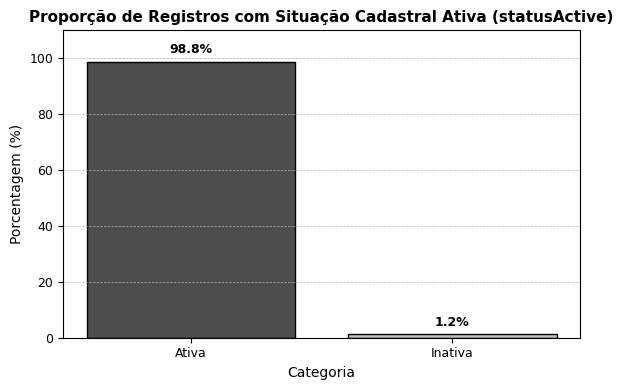

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Contagem dos valores em 'statusActive' com porcentagem
value_counts = data['statusActive'].value_counts(normalize=True) * 100

# Tons recomendados: cinza escuro para True, cinza claro para False
gray_colors = ['#4d4d4d' if value else '#bfbfbf' for value in value_counts.index]

# Criar novo gráfico com tons de cinza
plt.figure(figsize=(6, 4))

bars = plt.bar(
    value_counts.index.map({True: 'Ativa', False: 'Inativa'}),
    value_counts.values,
    color=gray_colors,
    edgecolor='black'
)

# Inserindo os valores de porcentagem acima das barras
for i, value in enumerate(value_counts.values):
    plt.text(i, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Configurações visuais IEEE
plt.title('Proporção de Registros com Situação Cadastral Ativa (statusActive)', fontsize=11, fontweight='bold')
plt.ylabel('Porcentagem (%)', fontsize=10)
plt.xlabel('Categoria', fontsize=10)
plt.ylim(0, 110)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Salvar o gráfico em tons de cinza
output_gray_path = "/content/drive/MyDrive/fraudes-financeiras-isolation-forest/statusActive.png"
plt.savefig(output_gray_path, dpi=600)
plt.show()
plt.close()

In [ ]:
# Remover registros onde 'cnae' é NaN
data = data.dropna(subset=['cnae'])

In [ ]:
# Remover registros onde 'foundation_date' é NaN
data = data.dropna(subset=['foundation'])

In [ ]:
# Contando valores NaN em todas as colunas
nan_por_coluna = data.isna().sum()

print(nan_por_coluna)

customerID                         0
updated                            0
rating                             0
name                               0
cnae                               0
registration                   88645
foundation                         0
address                            0
neighborhood                       0
city                               0
state                              0
zipCode                        77606
queries                            0
amountGreaterAccumulation          0
quantityGreaterAccumulation        0
amountDebit                        0
quantityDebit                      0
lastPurchase                   40231
statusActive                   52918
dtype: int64


**Algoritmo 2 – Identificação de alterações cadastrais por cliente**

In [ ]:
# Ordenar os dados
data = data.sort_values(by=['customerID', 'updated'], ascending=[True, True])

# Lista de colunas pertencetes ao endereço a serem verificadas
colunas_para_verificar = ['address', 'neighborhood', 'city', 'state', 'zipCode']

# Verificar se houve alteração em qualquer coluna do endereço
data['addressChanged'] = (
    data.groupby('customerID')[colunas_para_verificar]
    .apply(lambda group: group.ne(group.shift()).any(axis=1))
    .reset_index(drop=True)
)

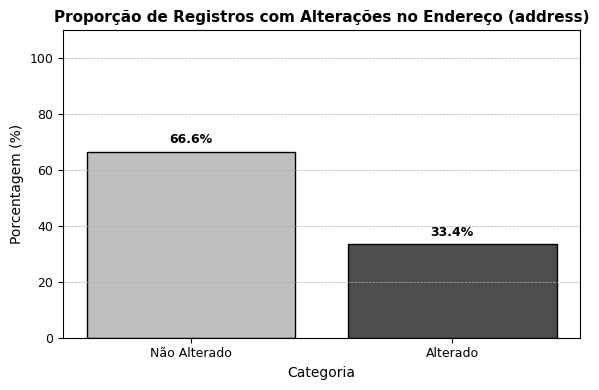

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Contagem dos valores em 'addressChanged' com porcentagem
value_counts = data['addressChanged'].value_counts(normalize=True) * 100

# Tons recomendados: cinza escuro para True, cinza claro para False
gray_colors = ['#4d4d4d' if value else '#bfbfbf' for value in value_counts.index]

# Criar novo gráfico com tons de cinza
plt.figure(figsize=(6, 4))

bars = plt.bar(
    value_counts.index.map({True: 'Alterado', False: 'Não Alterado'}),
    value_counts.values,
    color=gray_colors,
    edgecolor='black'
)

# Inserindo os valores de porcentagem acima das barras
for i, value in enumerate(value_counts.values):
    plt.text(i, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Configurações visuais IEEE
plt.title('Proporção de Registros com Alterações no Endereço (address)', fontsize=11, fontweight='bold')
plt.ylabel('Porcentagem (%)', fontsize=10)
plt.xlabel('Categoria', fontsize=10)
plt.ylim(0, 110)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Salvar o gráfico em tons de cinza
output_gray_path = "/content/drive/MyDrive/fraudes-financeiras-isolation-forest/addressChanged.png"
plt.savefig(output_gray_path, dpi=600)
plt.show()
plt.close()


In [ ]:
# Deletar as colunas originais
data = data.drop(columns=colunas_para_verificar)

In [ ]:
# Ordenar os dados
data = data.sort_values(by=['customerID', 'updated'], ascending=[True, True])

# Detectar mudanças na coluna cnae para cada customerID
data['cnaeChanged'] = (
    (data['cnae'] != data['cnae'].shift()) &  # Detecta mudanças na coluna cnae
    (data['customerID'] == data['customerID'].shift())  # Garante que seja dentro do mesmo customerID
)


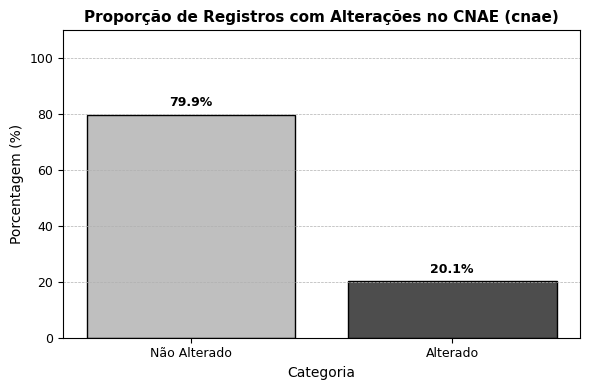

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Contagem dos valores em 'addressChanged' com porcentagem
value_counts = data['cnaeChanged'].value_counts(normalize=True) * 100

# Tons recomendados: cinza escuro para True, cinza claro para False
gray_colors = ['#4d4d4d' if value else '#bfbfbf' for value in value_counts.index]

# Criar novo gráfico com tons de cinza
plt.figure(figsize=(6, 4))

bars = plt.bar(
    value_counts.index.map({True: 'Alterado', False: 'Não Alterado'}),
    value_counts.values,
    color=gray_colors,
    edgecolor='black'
)

# Inserindo os valores de porcentagem acima das barras
for i, value in enumerate(value_counts.values):
    plt.text(i, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Configurações visuais IEEE
plt.title('Proporção de Registros com Alterações no CNAE (cnae)', fontsize=11, fontweight='bold')
plt.ylabel('Porcentagem (%)', fontsize=10)
plt.xlabel('Categoria', fontsize=10)
plt.ylim(0, 110)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Salvar o gráfico em tons de cinza
output_gray_path = "/content/drive/MyDrive/fraudes-financeiras-isolation-forest/cnaeChanged.png"
plt.savefig(output_gray_path, dpi=600)
plt.show()
plt.close()


In [ ]:
# Excluir a coluna cnae original, se necessário
data = data.drop(columns=['cnae'])

In [ ]:
# Ordenar os dados
data = data.sort_values(by=['customerID', 'updated'], ascending=[True, True])

# Detectar mudanças na coluna name para cada customerID
data['nameChanged'] = (
    (data['name'] != data['name'].shift()) &  # Detecta mudanças na coluna name
    (data['customerID'] == data['customerID'].shift())  # Garante que seja dentro do mesmo customerID
)


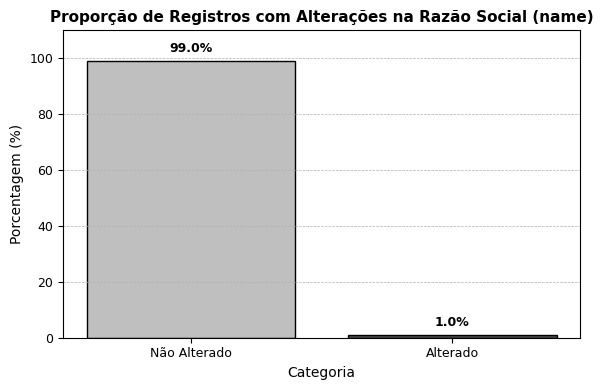

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Contagem dos valores em 'addressChanged' com porcentagem
value_counts = data['nameChanged'].value_counts(normalize=True) * 100

# Tons recomendados: cinza escuro para True, cinza claro para False
gray_colors = ['#4d4d4d' if value else '#bfbfbf' for value in value_counts.index]

# Criar novo gráfico com tons de cinza
plt.figure(figsize=(6, 4))

bars = plt.bar(
    value_counts.index.map({True: 'Alterado', False: 'Não Alterado'}),
    value_counts.values,
    color=gray_colors,
    edgecolor='black'
)

# Inserindo os valores de porcentagem acima das barras
for i, value in enumerate(value_counts.values):
    plt.text(i, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Configurações visuais IEEE
plt.title('Proporção de Registros com Alterações na Razão Social (name)', fontsize=11, fontweight='bold')
plt.ylabel('Porcentagem (%)', fontsize=10)
plt.xlabel('Categoria', fontsize=10)
plt.ylim(0, 110)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Salvar o gráfico em tons de cinza
output_gray_path = "/content/drive/MyDrive/fraudes-financeiras-isolation-forest/nameChanged.png"
plt.savefig(output_gray_path, dpi=600)
plt.show()
plt.close()

In [ ]:
# Excluir a coluna cnae original, se necessário
data = data.drop(columns=['name'])

In [ ]:
data.head(5)

,customerID,updated,rating,registration,foundation,queries,amountGreaterAccumulation,quantityGreaterAccumulation,amountDebit,quantityDebit,lastPurchase,statusActive,addressChanged,cnaeChanged,nameChanged
0,382108,2,d,1999-01-19,1991-04-25,4,50919498.38,12,23781257,7,2025-02-27,True,True,False,False
1,382108,3,c,1999-01-19,1991-04-25,1,50919088.96,11,24708162,6,2025-03-27,True,False,False,False
2,382108,5,d,1999-01-19,1991-04-25,1,75110064.88,13,37793130,10,2024-05-28,True,False,True,False
3,382108,6,c,1999-01-19,1991-04-25,1,60779630.00,11,32958037,8,2024-06-26,True,False,False,False
4,382108,7,c,1999-01-19,1991-04-25,3,52137216.34,11,25177567,7,2024-07-29,True,False,False,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191293 entries, 0 to 2191292
Data columns (total 15 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   customerID                   int64         
 1   updated                      int64         
 2   rating                       object        
 3   registration                 datetime64[ns]
 4   foundation                   datetime64[ns]
 5   queries                      int64         
 6   amountGreaterAccumulation    float64       
 7   quantityGreaterAccumulation  int64         
 8   amountDebit                  int64         
 9   quantityDebit                int64         
 10  lastPurchase                 datetime64[ns]
 11  statusActive                 object        
 12  addressChanged               bool          
 13  cnaeChanged                  bool          
 14  nameChanged                  bool          
dtypes: bool(3), datetime64[ns](3), float64(1), int64(

In [ ]:
from datetime import datetime

# Converte a coluna foundationDate para o formato datetime
data['foundation'] = pd.to_datetime(data['foundation'])

# Calcula o número de anos desde a data de fundação
data['yearsSinceFoundation'] = datetime.now().year - data['foundation'].dt.year

# Define a função para classificar o risco com base nos anos de fundação
def classify_risk(years):
    if years < 5:
        return 'High'
    elif 5 <= years <= 15:
        return 'Medium'
    else:
        return 'Low'

# Aplica a função de classificação
data['riskFoundation'] = data['yearsSinceFoundation'].apply(classify_risk)


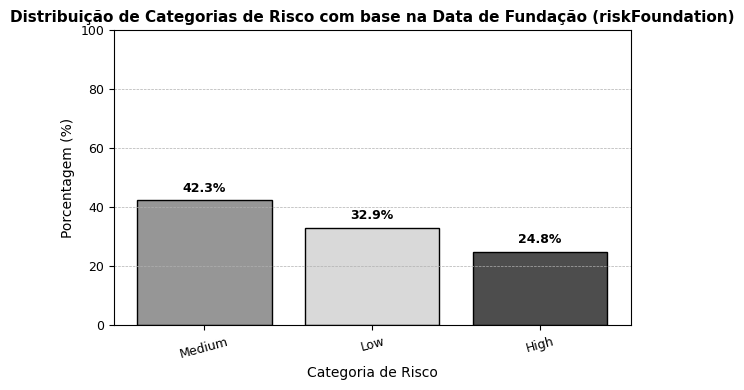

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Calcula a distribuição por categoria de risco em porcentagem
risk_counts_percentage = data['riskFoundation'].value_counts(normalize=True) * 100

# Definindo tons de cinza para cada categoria de risco
gray_colors = {
    'High': '#4d4d4d',    # Cinza escuro
    'Medium': '#969696',  # Cinza médio
    'Low': '#d9d9d9'      # Cinza claro
}

# Criando o gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(
    risk_counts_percentage.index,
    risk_counts_percentage.values,
    color=[gray_colors[risk] for risk in risk_counts_percentage.index],
    edgecolor='black'
)

# Inserindo os valores de porcentagem acima das barras
for i, value in enumerate(risk_counts_percentage.values):
    plt.text(i, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Configurações visuais IEEE
plt.title('Distribuição de Categorias de Risco com base na Data de Fundação (riskFoundation)', fontsize=11, fontweight='bold')
plt.ylabel('Porcentagem (%)', fontsize=10)
plt.xlabel('Categoria de Risco', fontsize=10)
plt.ylim(0, 100)
plt.xticks(rotation=15, fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Salvar o gráfico em tons de cinza
output_path = "/content/drive/MyDrive/fraudes-financeiras-isolation-forest/riskFoundation.png"
plt.savefig(output_gray_path, dpi=600)
plt.show()
plt.close()


In [ ]:
# Remover a coluna yearsSinceFoundation
data = data.drop(columns=['yearsSinceFoundation'])

In [ ]:
# Cria variável binária para data da fundacao recente
from datetime import datetime

data['isNewFoundation'] = data['foundation'].notna() & (
    ((datetime.now() - data['foundation']).dt.days / 365.25) < 3
)

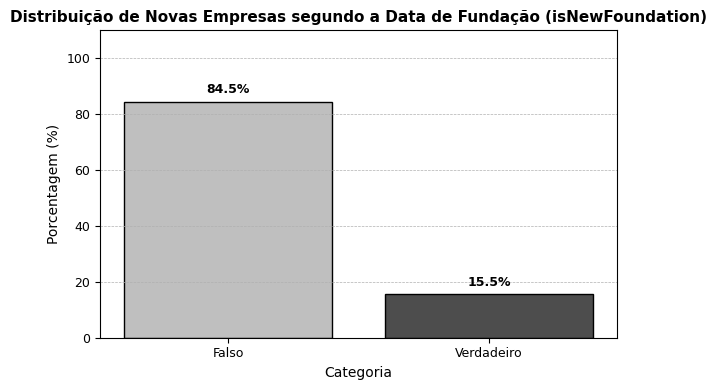

In [ ]:
# Simulando dados para 'isNewFoundation'
import pandas as pd
import matplotlib.pyplot as plt


# Contagem dos valores em 'isNewFoundation' com porcentagem
value_counts = data['isNewFoundation'].value_counts(normalize=True) * 100

# Definindo cores em tons de cinza: cinza escuro para True, cinza claro para False
colors = ['#4d4d4d' if value else '#bfbfbf' for value in value_counts.index]

# Criando o gráfico
plt.figure(figsize=(6, 4))

plt.bar(
    value_counts.index.map({True: 'Verdadeiro', False: 'Falso'}),
    value_counts.values,
    color=colors,
    edgecolor='black'
)

# Inserindo os valores de porcentagem acima das barras
for i, value in enumerate(value_counts.values):
    plt.text(i, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Configurações IEEE
plt.title('Distribuição de Novas Empresas segundo a Data de Fundação (isNewFoundation)', fontsize=11, fontweight='bold')
plt.ylabel('Porcentagem (%)', fontsize=10)
plt.xlabel('Categoria', fontsize=10)
plt.ylim(0, 110)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Salvar o gráfico
output_path = "/content/drive/MyDrive/fraudes-financeiras-isolation-forest/isNewFoundation.png"
plt.savefig(output_gray_path, dpi=600)
plt.show()
plt.close()


In [ ]:
from datetime import datetime, timedelta

def check_alert(dataset):
    # Obtem datas de referência
    current_date = datetime.now()
    date_minus_2_years = current_date.replace(year=current_date.year - 2)
    date_minus_4_years = current_date.replace(year=current_date.year - 4)

    # Adiciona uma nova coluna 'registrationAlert' com base na condição
    dataset['registrationAlert'] = (
        (pd.to_datetime(dataset['registration']) < date_minus_2_years) &
        (pd.to_datetime(dataset['foundation']) > date_minus_4_years)
    )

    return dataset

In [ ]:
# Aplica a função
data = check_alert(data)

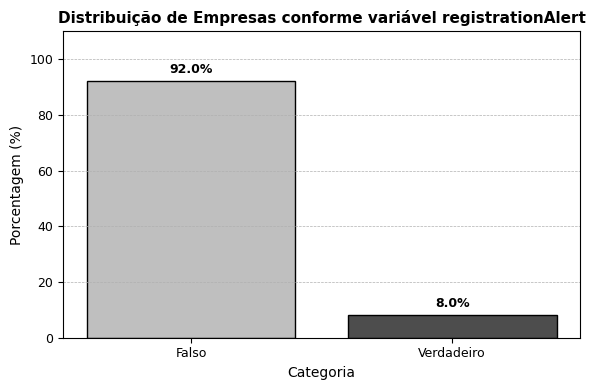

In [ ]:
# Simulando dados para 'registrationAlert'
import pandas as pd
import matplotlib.pyplot as plt


# Contagem dos valores em 'registrationAlert' com porcentagem
value_counts = data['registrationAlert'].value_counts(normalize=True) * 100

# Definindo cores em tons de cinza: cinza escuro para True, cinza claro para False
colors = ['#4d4d4d' if value else '#bfbfbf' for value in value_counts.index]

# Criando o gráfico
plt.figure(figsize=(6, 4))

plt.bar(
    value_counts.index.map({True: 'Verdadeiro', False: 'Falso'}),
    value_counts.values,
    color=colors,
    edgecolor='black'
)

# Inserindo os valores de porcentagem acima das barras
for i, value in enumerate(value_counts.values):
    plt.text(i, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Configurações IEEE
plt.title('Distribuição de Empresas conforme variável registrationAlert', fontsize=11, fontweight='bold')
plt.ylabel('Porcentagem (%)', fontsize=10)
plt.xlabel('Categoria', fontsize=10)
plt.ylim(0, 110)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Salvar o gráfico
output_path = "/content/drive/MyDrive/fraudes-financeiras-isolation-forest/registrationAlert.png"
plt.savefig(output_gray_path, dpi=600)
plt.show()
plt.close()


In [ ]:
# Remover a coluna foundationDate e registration
data = data.drop(columns=['foundation'])
data = data.drop(columns=['registration'])

KeyError: "['foundation'] not found in axis"

**Comportamento no Volume de Consultas**

In [ ]:
# Calcula a média móvel de 3 meses para cada cliente
data['3_months_avg'] = (
    data.groupby('customerID')['queries']
    .apply(lambda x: x.rolling(window=3, min_periods=1).mean())
    .reset_index(level=0, drop=True)  # Reset o índice para corresponder ao DataFrame original.
)

In [ ]:
# Verifica se houve um aumento de 30% em comparação com a média móvel de 3 meses
data['queriesIncreaseAlert'] = (
    (data['queries'] > 1.3 * data['3_months_avg']) &
    (data['3_months_avg'] > 0)  # Para evitar a divisão por zero
)

In [ ]:
# Remover a coluna foundationDate e registration
data = data.drop(columns=['3_months_avg'])
data = data.drop(columns=['queries'])

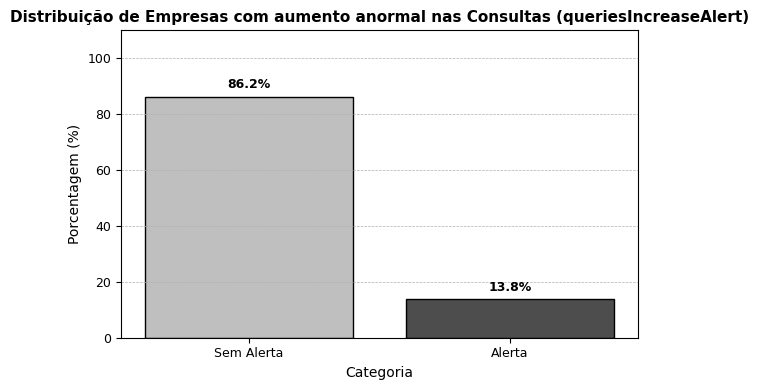

In [ ]:
# Simulando dados para 'queriesIncreaseAlert'
import pandas as pd
import matplotlib.pyplot as plt


# Contagem dos valores em 'queriesIncreaseAlert' com porcentagem
value_counts = data['queriesIncreaseAlert'].value_counts(normalize=True) * 100

# Definindo cores em tons de cinza: cinza escuro para True, cinza claro para False
colors = ['#4d4d4d' if value else '#bfbfbf' for value in value_counts.index]

# Criando o gráfico
plt.figure(figsize=(6, 4))

plt.bar(
    value_counts.index.map({True: 'Alerta', False: 'Sem Alerta'}),
    value_counts.values,
    color=colors,
    edgecolor='black'
)

# Inserindo os valores de porcentagem acima das barras
for i, value in enumerate(value_counts.values):
    plt.text(i, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Configurações IEEE
plt.title('Distribuição de Empresas com aumento anormal nas Consultas (queriesIncreaseAlert)', fontsize=11, fontweight='bold')
plt.ylabel('Porcentagem (%)', fontsize=10)
plt.xlabel('Categoria', fontsize=10)
plt.ylim(0, 110)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Salvar o gráfico
output_path = "/content/drive/MyDrive/fraudes-financeiras-isolation-forest/queriesIncreaseAlert.png"
plt.savefig(output_gray_path, dpi=600)
plt.show()
plt.close()


In [ ]:
# Verifica se houve compra recente nos últimos 3 meses

data['lastPurchase'] = pd.to_datetime(data['lastPurchase'])

# Cria a variável booleana com base na data de corte
data['isLastPurchase'] = data['lastPurchase'] > pd.to_datetime('2025-02-28')

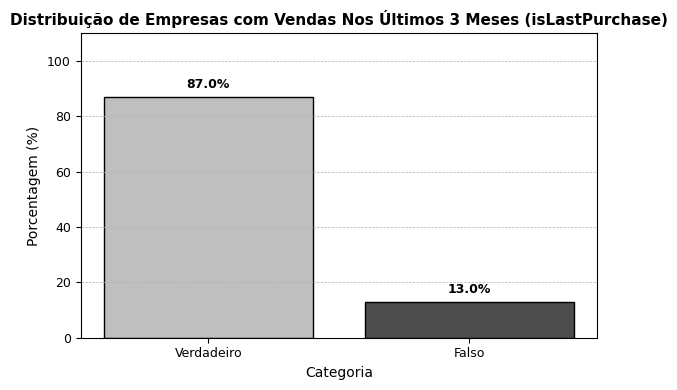

In [ ]:
# Simulando dados para 'isLastPurchase'
import pandas as pd
import matplotlib.pyplot as plt


# Contagem dos valores em 'isLastPurchase' com porcentagem
value_counts = data['isLastPurchase'].value_counts(normalize=True) * 100

# Definindo cores em tons de cinza: cinza escuro para True, cinza claro para False
colors = ['#4d4d4d' if value else '#bfbfbf' for value in value_counts.index]

# Criando o gráfico
plt.figure(figsize=(6, 4))

plt.bar(
    value_counts.index.map({True: 'Falso', False: 'Verdadeiro'}),
    value_counts.values,
    color=colors,
    edgecolor='black'
)

# Inserindo os valores de porcentagem acima das barras
for i, value in enumerate(value_counts.values):
    plt.text(i, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Configurações IEEE
plt.title('Distribuição de Empresas com Vendas Nos Últimos 3 Meses (isLastPurchase)', fontsize=11, fontweight='bold')
plt.ylabel('Porcentagem (%)', fontsize=10)
plt.xlabel('Categoria', fontsize=10)
plt.ylim(0, 110)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Salvar o gráfico
output_path = "/content/drive/MyDrive/fraudes-financeiras-isolation-forest/isLastPurchase.png"
plt.savefig(output_gray_path, dpi=600)
plt.show()
plt.close()

In [ ]:
data = data.drop(columns=['lastPurchase'])

In [ ]:
data.to_csv("/content/drive/MyDrive/fraudes-financeiras-isolation-forest/data.csv", index=False, encoding='utf-8')  # index=False para não salvar o índice
print("Arquivo salvo com sucesso: 'data.csv'")

Arquivo salvo com sucesso: 'data.csv'


In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import hashlib
import matplotlib.pyplot as plt

In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/fraudes-financeiras-isolation-forest/data.csv');

In [ ]:
data2.head(5)

,customerID,updated,rating,amountGreaterAccumulation,quantityGreaterAccumulation,amountDebit,quantityDebit,statusActive,addressChanged,cnaeChanged,nameChanged,riskFoundation,isNewFoundation,registrationAlert,queriesIncreaseAlert,isLastPurchase
0,382108,2,d,50919498.38,12,23781257,7,True,True,False,False,Low,False,False,False,False
1,382108,3,c,50919088.96,11,24708162,6,True,False,False,False,Low,False,False,False,True
2,382108,5,d,75110064.88,13,37793130,10,True,False,True,False,Low,False,False,False,False
3,382108,6,c,60779630.00,11,32958037,8,True,False,False,False,Low,False,False,False,False
4,382108,7,c,52137216.34,11,25177567,7,True,False,False,False,Low,False,False,True,False


**Crescimento Atípico no Valor do Maior Acúmulo**

In [ ]:
# Ordenar os dados
data2 = data2.sort_values(by=['customerID', 'updated'], ascending=[True, True])

In [ ]:
# Calcula a média móvel de 3 meses para cada cliente
data2['3_months_avg'] = (
    data2.groupby('customerID')['amountGreaterAccumulation']
    .apply(lambda x: x.rolling(window=3, min_periods=1).mean())
    .reset_index(level=0, drop=True)  # Reset o índice para corresponder ao DataFrame original.
)

In [ ]:
# Verifica se houve um aumento de 30% em comparação com a média móvel de 3 meses
data2['amountGreaterAccumulationAlert'] = (
    (data2['amountGreaterAccumulation'] > 1.3 * data2['3_months_avg']) &
    (data2['3_months_avg'] > 0)  # Para evitar a divisão por zero
)

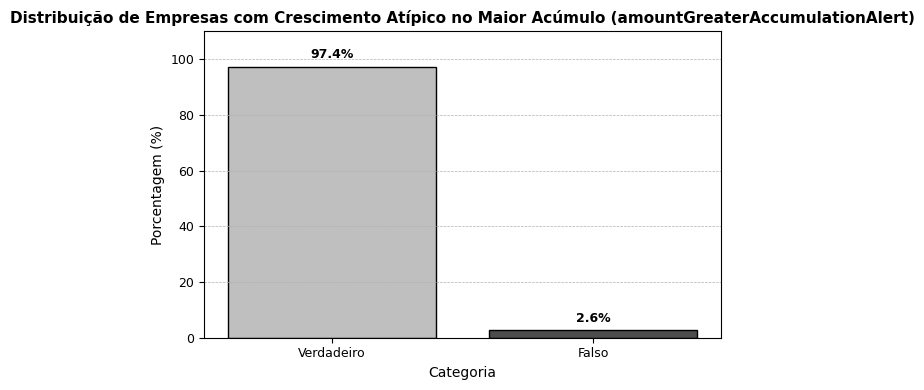

In [ ]:
# Simulando dados para 'amountGreaterAccumulationAlert'
import pandas as pd
import matplotlib.pyplot as plt


# Contagem dos valores em 'amountGreaterAccumulationAlert' com porcentagem
value_counts = data2['amountGreaterAccumulationAlert'].value_counts(normalize=True) * 100

# Definindo cores em tons de cinza: cinza escuro para True, cinza claro para False
colors = ['#4d4d4d' if value else '#bfbfbf' for value in value_counts.index]

# Criando o gráfico
plt.figure(figsize=(6, 4))

plt.bar(
    value_counts.index.map({True: 'Falso', False: 'Verdadeiro'}),
    value_counts.values,
    color=colors,
    edgecolor='black'
)

# Inserindo os valores de porcentagem acima das barras
for i, value in enumerate(value_counts.values):
    plt.text(i, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Configurações IEEE
plt.title('Distribuição de Empresas com Crescimento Atípico no Maior Acúmulo (amountGreaterAccumulationAlert)', fontsize=11, fontweight='bold')
plt.ylabel('Porcentagem (%)', fontsize=10)
plt.xlabel('Categoria', fontsize=10)
plt.ylim(0, 110)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Salvar o gráfico
output_path = "/content/drive/MyDrive/fraudes-financeiras-isolation-forest/amountGreaterAccumulationAlert.png"
plt.savefig(output_gray_path, dpi=600)
plt.show()
plt.close()

In [ ]:
# Drop the moving average column
data2 = data2.drop(columns=['3_months_avg'])
data2 = data2.drop(columns=['amountGreaterAccumulation'])


KeyError: "['3_months_avg'] not found in axis"

**Crescimento na Quantidade de Associadas no Maior Acúmulo**



In [ ]:
# Calcula a média móvel de 3 meses para cada cliente
data2['3_months_avg'] = (
    data2.groupby('customerID')['quantityGreaterAccumulation']
    .apply(lambda x: x.rolling(window=3, min_periods=1).mean())
    .reset_index(level=0, drop=True)  # Reset o índice para corresponder ao DataFrame original.
)

In [ ]:
# Verifica se houve um aumento de 30% em comparação com a média móvel de 3 meses
data2['quantityGreaterAccumulationAlert'] = (
    (data2['quantityGreaterAccumulation'] > 1.3 * data2['3_months_avg']) &
    (data2['3_months_avg'] > 0)  # Para evitar a divisão por zero
)

In [ ]:
# Drop the moving average column
data2 = data2.drop(columns=['3_months_avg'])
data2 = data2.drop(columns=['quantityGreaterAccumulation'])

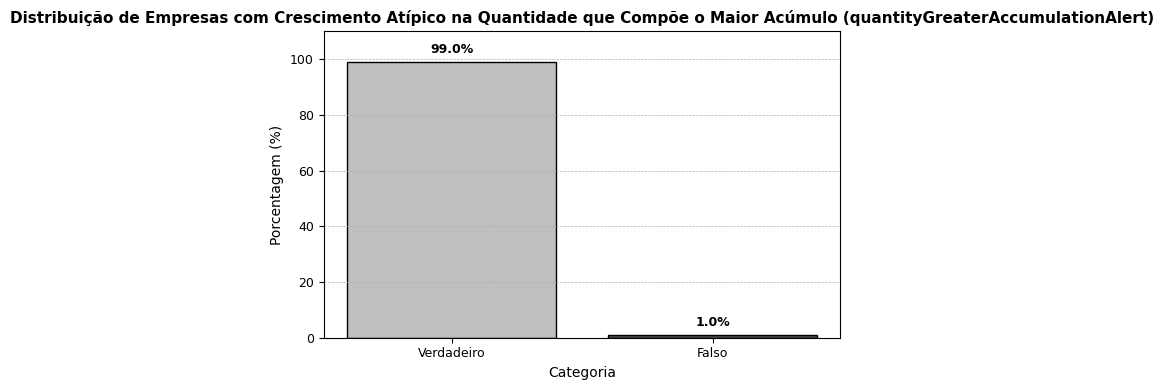

In [ ]:
# Simulando dados para 'quantityGreaterAccumulationAlert'
import pandas as pd
import matplotlib.pyplot as plt


# Contagem dos valores em 'quantityGreaterAccumulationAlert' com porcentagem
value_counts = data2['quantityGreaterAccumulationAlert'].value_counts(normalize=True) * 100

# Definindo cores em tons de cinza: cinza escuro para True, cinza claro para False
colors = ['#4d4d4d' if value else '#bfbfbf' for value in value_counts.index]

# Criando o gráfico
plt.figure(figsize=(6, 4))

plt.bar(
    value_counts.index.map({True: 'Falso', False: 'Verdadeiro'}),
    value_counts.values,
    color=colors,
    edgecolor='black'
)

# Inserindo os valores de porcentagem acima das barras
for i, value in enumerate(value_counts.values):
    plt.text(i, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Configurações IEEE
plt.title('Distribuição de Empresas com Crescimento Atípico na Quantidade que Compõe o Maior Acúmulo (quantityGreaterAccumulationAlert)', fontsize=11, fontweight='bold')
plt.ylabel('Porcentagem (%)', fontsize=10)
plt.xlabel('Categoria', fontsize=10)
plt.ylim(0, 110)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Salvar o gráfico
output_path = "/content/drive/MyDrive/fraudes-financeiras-isolation-forest/quantityGreaterAccumulationAlert.png"
plt.savefig(output_gray_path, dpi=600)
plt.show()
plt.close()

**Crescimento Atípico no Valor do Débito Total**

In [ ]:
# Calcula a média móvel de 3 meses para cada cliente
data2['3_months_avg'] = (
    data2.groupby('customerID')['amountDebit']
    .apply(lambda x: x.rolling(window=3, min_periods=1).mean())
    .reset_index(level=0, drop=True)  # Reset o índice para corresponder ao DataFrame original.
)

In [ ]:
# Verifica se houve um aumento de 30% em comparação com a média móvel de 3 meses
data2['amountDebitAlert'] = (
    (data2['amountDebit'] > 1.3 * data2['3_months_avg']) &
    (data2['3_months_avg'] > 0)  # Para evitar a divisão por zero
)

In [ ]:
# Drop the moving average column
data2 = data2.drop(columns=['3_months_avg'])
data2 = data2.drop(columns=['amountDebit'])

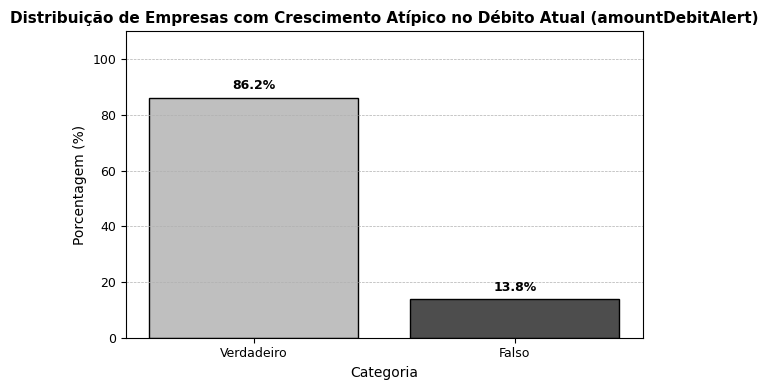

In [ ]:
# Simulando dados para 'amountDebitAlert'
import pandas as pd
import matplotlib.pyplot as plt


# Contagem dos valores em 'amountDebitAlert' com porcentagem
value_counts = data2['amountDebitAlert'].value_counts(normalize=True) * 100

# Definindo cores em tons de cinza: cinza escuro para True, cinza claro para False
colors = ['#4d4d4d' if value else '#bfbfbf' for value in value_counts.index]

# Criando o gráfico
plt.figure(figsize=(6, 4))

plt.bar(
    value_counts.index.map({True: 'Falso', False: 'Verdadeiro'}),
    value_counts.values,
    color=colors,
    edgecolor='black'
)

# Inserindo os valores de porcentagem acima das barras
for i, value in enumerate(value_counts.values):
    plt.text(i, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Configurações IEEE
plt.title('Distribuição de Empresas com Crescimento Atípico no Débito Atual (amountDebitAlert)', fontsize=11, fontweight='bold')
plt.ylabel('Porcentagem (%)', fontsize=10)
plt.xlabel('Categoria', fontsize=10)
plt.ylim(0, 110)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Salvar o gráfico
output_path = "/content/drive/MyDrive/fraudes-financeiras-isolation-forest/amountDebitAlert.png"
plt.savefig(output_gray_path, dpi=600)
plt.show()
plt.close()

**Crescimento na Quantidade de Associadas no Valor do Débito Total**


In [ ]:
# Calcula a média móvel de 3 meses para cada cliente
data2['3_months_avg'] = (
    data2.groupby('customerID')['quantityDebit']
    .apply(lambda x: x.rolling(window=3, min_periods=1).mean())
    .reset_index(level=0, drop=True)  # Reset o índice para corresponder ao DataFrame original.
)

In [ ]:
# Verifica se houve um aumento de 30% em comparação com a média móvel de 3 meses
data2['quantityDebitAlert'] = (
    (data2['quantityDebit'] > 1.3 * data2['3_months_avg']) &
    (data2['3_months_avg'] > 0)  # Para evitar -a divisão por zero
)

In [ ]:
# Drop the moving average column
data2 = data2.drop(columns=['3_months_avg'])
data2 = data2.drop(columns=['quantityDebit'])

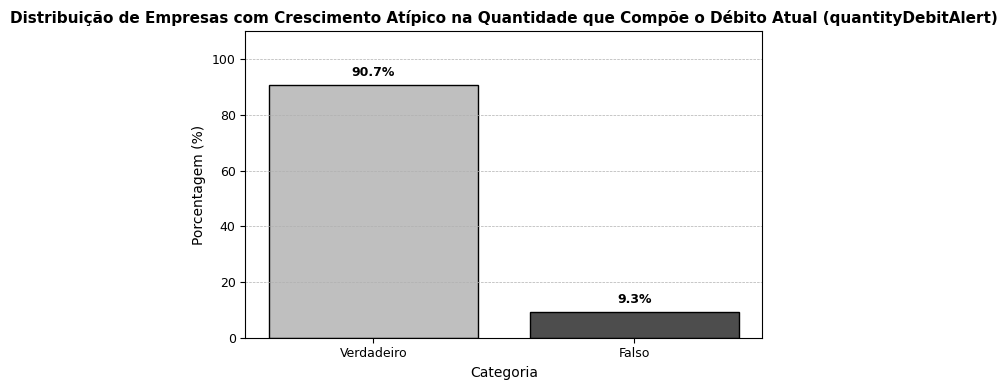

In [ ]:
# Simulando dados para 'quantityDebitAlert'
import pandas as pd
import matplotlib.pyplot as plt


# Contagem dos valores em 'quantityDebitAlert' com porcentagem
value_counts = data2['quantityDebitAlert'].value_counts(normalize=True) * 100

# Definindo cores em tons de cinza: cinza escuro para True, cinza claro para False
colors = ['#4d4d4d' if value else '#bfbfbf' for value in value_counts.index]

# Criando o gráfico
plt.figure(figsize=(6, 4))

plt.bar(
    value_counts.index.map({True: 'Falso', False: 'Verdadeiro'}),
    value_counts.values,
    color=colors,
    edgecolor='black'
)

# Inserindo os valores de porcentagem acima das barras
for i, value in enumerate(value_counts.values):
    plt.text(i, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Configurações IEEE
plt.title('Distribuição de Empresas com Crescimento Atípico na Quantidade que Compõe o Débito Atual (quantityDebitAlert)', fontsize=11, fontweight='bold')
plt.ylabel('Porcentagem (%)', fontsize=10)
plt.xlabel('Categoria', fontsize=10)
plt.ylim(0, 110)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Salvar o gráfico
output_path = "/content/drive/MyDrive/fraudes-financeiras-isolation-forest/quantityDebitAlert.png"
plt.savefig(output_gray_path, dpi=600)
plt.show()
plt.close()

In [ ]:
data2.to_csv("/content/drive/MyDrive/fraudes-financeiras-isolation-forest/consolidatedData.csv", index=False, encoding='utf-8')  # index=False para não salvar o índice
print("Arquivo salvo como 'consolidatedData.csv'")

Arquivo salvo como 'consolidatedData.csv'


# **Isolation Forest**

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fraudes-financeiras-isolation-forest/consolidatedData.csv');

In [ ]:
df.head(10)

,customerID,updated,rating,amountGreaterAccumulation,statusActive,addressChanged,cnaeChanged,nameChanged,riskFoundation,isNewFoundation,registrationAlert,queriesIncreaseAlert,isLastPurchase,amountGreaterAccumulationAlert,quantityGreaterAccumulationAlert,amountDebitAlert,quantityDebitAlert
0,382108,2,d,50919498.38,True,True,False,False,Low,False,False,False,False,False,False,False,False
1,382108,3,c,50919088.96,True,False,False,False,Low,False,False,False,True,False,False,False,False
2,382108,5,d,75110064.88,True,False,True,False,Low,False,False,False,False,False,False,True,True
3,382108,6,c,60779630.00,True,False,False,False,Low,False,False,False,False,False,False,False,False
4,382108,7,c,52137216.34,True,False,False,False,Low,False,False,True,False,False,False,False,False
5,382108,8,c,52191882.03,True,False,False,False,Low,False,False,False,False,False,False,False,False
6,382108,10,d,52281222.37,True,False,False,False,Low,False,False,False,False,False,False,False,False
7,382108,11,c,52299057.93,True,False,False,False,Low,False,False,True,False,False,False,False,False
8,382108,12,c,51045544.90,True,True,False,False,Low,False,False,False,False,False,False,False,False
9,3000125,2,e,0.00,NaN,True,False,False,Low,False,False,False,False,False,False,False,False


In [ ]:
df = df.dropna()

In [ ]:
df.head()

,customerID,updated,rating,amountGreaterAccumulation,statusActive,addressChanged,cnaeChanged,nameChanged,riskFoundation,isNewFoundation,registrationAlert,queriesIncreaseAlert,isLastPurchase,amountGreaterAccumulationAlert,quantityGreaterAccumulationAlert,amountDebitAlert,quantityDebitAlert
0,382108,2,d,50919498.38,True,True,False,False,Low,False,False,False,False,False,False,False,False
1,382108,3,c,50919088.96,True,False,False,False,Low,False,False,False,True,False,False,False,False
2,382108,5,d,75110064.88,True,False,True,False,Low,False,False,False,False,False,False,True,True
3,382108,6,c,60779630.00,True,False,False,False,Low,False,False,False,False,False,False,False,False
4,382108,7,c,52137216.34,True,False,False,False,Low,False,False,True,False,False,False,False,False


In [ ]:
df.shape

(2138375, 17)

In [ ]:
# Garantir que customerID está como string de 14 dígitos
df['customerID'] = df['customerID'].astype(str).str.zfill(14)

In [ ]:
import pandas as pd

# Dados do dicionário
data_dict = {
    "Nome da Variável": [
           "customerID", "updated", "rating", "statusActive", "addressChanged", "cnaeChanged", "nameChanged", "riskFoundation","isNewFoundation", "registrationAlert","queriesIncreaseAlert","isLastPurchase", "amountGreaterAccumulationAlert","quantityGreaterAccumulationAlert",
           "amountDebitAlert","quantityDebitAlert"],
    "Tipo de Dados": [
        "String", "Date", "String", "Boolean", "Boolean", "Boolean", "Boolean", "Boolean",
        "Boolean", "Boolean", "Boolean", "Boolean", "Boolean", "Boolean", "Boolean", "Boolean"],
    "Descrição": [
        "CNPJ Identificação única da empresa (Cadastro Nacional da Pessoa Jurídica)",
        "Data da informação (Mês e Ano)  formato YYYY-MM",
        "Classificação do risco de performance empresa (score de crédito)",
        "Alteração no status da empresa (ativo ou inativo)",
        "Alteração no endereço da empresa",
        "Alteração na atividade econômica da empresa",
        "Alteração no nome da empresa",
        "Risco associado à data de fundação da empresa",
        "Empresa é nova (fundada nos últimos 3 meses)",
        "Alerta de registro recente da empresa",
        "Alerta de aumento anormal nas consultas à empresa",
        "Empresa realizou compras nos últimos 3 meses",
        "Alerta de crescimento atípico no valor que compõe o maior acumulador de crédito",
        "Alerta de crescimento atípico na quantidade que compõe o maior acumulador de crédito",
        "Alerta de crescimento atípico no valor do débito atual",
        "Alerta de crescimento atípico na quantidade que compõe o débito atual"
    ],
    "Exemplo de Valor": [
        "43454446000107", "2025-05", "A", "False", "False", "False", "False", "False",
        "False", "False", "False", "False", "False", "False", "False", "False"
    ]
}

# Criando o DataFrame
data_dict_df = pd.DataFrame(data_dict)

# Salvando como tabela para inclusão na tese
data_dict_df.to_csv("/content/drive/MyDrive/fraudes-financeiras-isolation-forest/dicionario-de-dados-trabalhado.csv", index=False)

# Gerando o LaTeX
latex_output = data_dict_df.to_latex(index=False, longtable=True)

# Salvando o LaTeX em um arquivo
with open("dicionario_de_dados.tex", "w") as f:
    f.write(latex_output)

# Configurações de exibição
pd.set_option('display.max_rows', 100)       # Exibe até 100 linhas
pd.set_option('display.max_columns', 50)    # Exibe até 50 colunas
pd.set_option('display.width', 10000)        # Ajusta a largura para não cortar
pd.set_option('display.colheader_justify', 'left')  # Justifica os nomes das colunas


# Exibindo o DataFrame
print(data_dict_df)

# Exibindo o código LaTeX
print(latex_output)

   Nome da Variável                  Tipo de Dados Descrição                                          Exemplo de Valor
0                         customerID   String       CNPJ Identificação única da empresa (Cadastro ...  43454446000107 
1                            updated     Date         Data da informação (Mês e Ano)  formato YYYY-MM         2025-05 
2                             rating   String       Classificação do risco de performance empresa ...               A 
3                       statusActive  Boolean       Alteração no status da empresa (ativo ou inativo)           False 
4                     addressChanged  Boolean                        Alteração no endereço da empresa           False 
5                        cnaeChanged  Boolean             Alteração na atividade econômica da empresa           False 
6                        nameChanged  Boolean                            Alteração no nome da empresa           False 
7                     riskFoundation  Boolean   

In [ ]:
#Executar o filtro de acordo com o Rating (Médio e Alto Risco) C, D e E
quantidade = df.shape[0]
print(f"Quantidade de registros: {quantidade}")

Quantidade de registros: 2138375


In [ ]:
#Executar o filtro de acordo com o Rating (Médio e Alto Risco) C, D e E
df = df[df['rating'].isin(['c', 'd', 'e'])]

In [ ]:
#total filtrado
quantidade = df.shape[0]
print(f"Quantidade de registros: {quantidade}")

Quantidade de registros: 587167


In [ ]:
# Aplicar One-Hot Encoding em múltiplas colunas
columns_to_encode = [
    'addressChanged',
    'statusActive',
    'cnaeChanged',
    'nameChanged',
    'riskFoundation',
    'registrationAlert',
    'queriesIncreaseAlert',
    'quantityGreaterAccumulationAlert',
    'quantityDebitAlert',
    'amountDebitAlert',
    'amountGreaterAccumulationAlert'
    ]
df = pd.get_dummies(df, columns=columns_to_encode)

In [ ]:
df.head()

,customerID,updated,rating,amountGreaterAccumulation,isNewFoundation,isLastPurchase,addressChanged_False,addressChanged_True,statusActive_False,statusActive_True,cnaeChanged_False,cnaeChanged_True,nameChanged_False,nameChanged_True,riskFoundation_High,riskFoundation_Low,riskFoundation_Medium,registrationAlert_False,registrationAlert_True,queriesIncreaseAlert_False,queriesIncreaseAlert_True,quantityGreaterAccumulationAlert_False,quantityGreaterAccumulationAlert_True,quantityDebitAlert_False,quantityDebitAlert_True,amountDebitAlert_False,amountDebitAlert_True,amountGreaterAccumulationAlert_False,amountGreaterAccumulationAlert_True
0,00000000382108,2,d,50919498.38,False,False,False,True,False,True,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False
1,00000000382108,3,c,50919088.96,False,True,True,False,False,True,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False
2,00000000382108,5,d,75110064.88,False,False,True,False,False,True,False,True,True,False,False,True,False,True,False,True,False,True,False,False,True,False,True,True,False
3,00000000382108,6,c,60779630.00,False,False,True,False,False,True,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False
4,00000000382108,7,c,52137216.34,False,False,True,False,False,True,True,False,True,False,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False


In [ ]:
filtro_de = df[df['rating'].isin(['c', 'd', 'e'])]
cnpjs_unicos = filtro_de['customerID'].unique()
quantidade_cnpjs_unicos = len(cnpjs_unicos)
print(f"Quantidade de CNPJs únicos com rating 'c 'd' ou 'e': {quantidade_cnpjs_unicos}")

Quantidade de CNPJs únicos com rating 'c 'd' ou 'e': 260975


In [ ]:
print(cnpjs_unicos[:30])


['00000000382108' '00000208000100' '00000577000101' '00000993000100'
 '00001180000126' '00002229000165' '00002852000118' '00003448000169'
 '00004298000108' '00004686000199' '00005032000180' '00005063000130'
 '00005103000144' '00005929000103' '00006316000190' '00006879000189'
 '00008199000102' '00008203000124' '00008808000115' '00008978000108'
 '00010417000135' '00010981000158' '00011853000129' '00012764000105'
 '00012810000168' '00013208000145' '00013427000124' '00013579000127'
 '00014393000192' '00014917000145']


In [ ]:
#Filtrar as anomalias e indimplencias reais para não treinar no modelo

# Lista de anomalias(golpes) reais
anomalia = ['00109498000125', '00827368000128', '17496140000103', '41439232000128', '30911251000199', '08002972000127']

# Lista de inadimplencias(normais) reais
normal = ['09242923000124', '97551360000113', ' 97550909000155', '00005929000103', '00013579000127', '97538546000132', ' 00164583000196', '00144585000113', '00099334000164']

anomalias_reais = df[df['customerID'].isin(anomalia)]
normal_reais = df[df['customerID'].isin(normal)]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


In [ ]:
X = df.drop(columns=['customerID', 'updated', 'rating'])

In [ ]:
from sklearn.ensemble import IsolationForest

# Treinar o Isolation Forest com a taxa real de anomalias
model = IsolationForest(contamination=0.01, random_state=42)
model.fit(X)

IsolationForest(contamination=0.01, random_state=42)

In [ ]:
# Predições
y_pred = model.predict(X)

In [ ]:
df['y_pred'] = y_pred

In [ ]:
df.head(5)

,customerID,updated,rating,amountGreaterAccumulation,isNewFoundation,isLastPurchase,addressChanged_False,addressChanged_True,statusActive_False,statusActive_True,cnaeChanged_False,cnaeChanged_True,nameChanged_False,nameChanged_True,riskFoundation_High,riskFoundation_Low,riskFoundation_Medium,registrationAlert_False,registrationAlert_True,queriesIncreaseAlert_False,queriesIncreaseAlert_True,quantityGreaterAccumulationAlert_False,quantityGreaterAccumulationAlert_True,quantityDebitAlert_False,quantityDebitAlert_True,amountDebitAlert_False,amountDebitAlert_True,amountGreaterAccumulationAlert_False,amountGreaterAccumulationAlert_True,y_pred
0,00000000382108,2,d,50919498.38,False,False,False,True,False,True,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,1
1,00000000382108,3,c,50919088.96,False,True,True,False,False,True,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,1
2,00000000382108,5,d,75110064.88,False,False,True,False,False,True,False,True,True,False,False,True,False,True,False,True,False,True,False,False,True,False,True,True,False,1
3,00000000382108,6,c,60779630.00,False,False,True,False,False,True,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,1
4,00000000382108,7,c,52137216.34,False,False,True,False,False,True,True,False,True,False,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,1


In [ ]:
print(df['y_pred'].value_counts())

y_pred
 1    581307
-1      5860
Name: count, dtype: int64


In [ ]:
import numpy as np

# Percentual de anomalias detectadas
anomaly_percentage = np.mean(y_pred == -1) * 100
print(f'Anomalias detectadas: {anomaly_percentage:.2f}%')


Anomalias detectadas: 1.00%


In [ ]:
anomalias_reais.head(100)

,customerID,updated,rating,amountGreaterAccumulation,isNewFoundation,isLastPurchase,addressChanged_False,addressChanged_True,statusActive_False,statusActive_True,cnaeChanged_False,cnaeChanged_True,nameChanged_False,nameChanged_True,riskFoundation_High,riskFoundation_Low,riskFoundation_Medium,registrationAlert_False,registrationAlert_True,queriesIncreaseAlert_False,queriesIncreaseAlert_True,quantityGreaterAccumulationAlert_False,quantityGreaterAccumulationAlert_True,quantityDebitAlert_False,quantityDebitAlert_True,amountDebitAlert_False,amountDebitAlert_True,amountGreaterAccumulationAlert_False,amountGreaterAccumulationAlert_True
3038,00109498000125,8,e,7783.27,False,False,False,True,False,True,False,True,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True
28405,00827368000128,2,e,4472.98,False,False,False,True,False,True,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False
28406,00827368000128,7,c,4472.98,False,False,True,False,False,True,False,True,True,False,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False
28407,00827368000128,8,d,4472.98,False,False,True,False,False,True,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False
341264,08002972000127,6,c,5251.74,False,False,False,True,False,True,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False
341265,08002972000127,7,c,5251.74,False,False,True,False,False,True,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False
341266,08002972000127,8,c,5699.28,False,False,True,False,False,True,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False
341267,08002972000127,10,c,5022.65,False,False,True,False,False,True,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False
341268,08002972000127,12,d,5015.67,False,False,True,False,False,True,False,True,True,False,False,True,False,True,False,True,False,True,False,True,False,False,True,True,False
705337,17496140000103,10,d,80.51,False,False,False,True,False,True,True,False,True,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False


In [ ]:
# Selecionando os testes em uma linha do tempo

# Criar o novo dataset com o maior valor de 'updated' para cada 'customerID'
anomalias_reais = anomalias_reais.loc[anomalias_reais.groupby('customerID')['updated'].idxmax()]

# Resetar o índice, se quiser
anomalias_reais = anomalias_reais.reset_index(drop=True)

# Visualizar o novo dataset
print(anomalias_reais.head(50))


  customerID       updated rating  amountGreaterAccumulation  isNewFoundation  isLastPurchase  addressChanged_False  addressChanged_True  statusActive_False  statusActive_True  cnaeChanged_False  cnaeChanged_True  nameChanged_False  nameChanged_True  riskFoundation_High  riskFoundation_Low  riskFoundation_Medium  registrationAlert_False  registrationAlert_True  queriesIncreaseAlert_False  queriesIncreaseAlert_True  quantityGreaterAccumulationAlert_False  quantityGreaterAccumulationAlert_True  quantityDebitAlert_False  quantityDebitAlert_True  amountDebitAlert_False  amountDebitAlert_True  amountGreaterAccumulationAlert_False  amountGreaterAccumulationAlert_True
0  00109498000125   8       e      7783.27                    False            False           False                  True                False               True               False               True             True               False             False                 True               False                  True           

In [ ]:
# Adicionando a coluna y_real com valor -1
anomalias_reais.loc[:, 'y_real'] = -1


In [ ]:
# Selecionando os testes em uma linha do tempo

# Criar o novo dataset com o maior valor de 'updated' para cada 'customerID'
normal_reais = normal_reais.loc[normal_reais.groupby('customerID')['updated'].idxmax()]

# Resetar o índice, se quiser
normal_reais = normal_reais.reset_index(drop=True)

# Visualizar o novo dataset
print(normal_reais.head(50))

  customerID       updated rating  amountGreaterAccumulation  isNewFoundation  isLastPurchase  addressChanged_False  addressChanged_True  statusActive_False  statusActive_True  cnaeChanged_False  cnaeChanged_True  nameChanged_False  nameChanged_True  riskFoundation_High  riskFoundation_Low  riskFoundation_Medium  registrationAlert_False  registrationAlert_True  queriesIncreaseAlert_False  queriesIncreaseAlert_True  quantityGreaterAccumulationAlert_False  quantityGreaterAccumulationAlert_True  quantityDebitAlert_False  quantityDebitAlert_True  amountDebitAlert_False  amountDebitAlert_True  amountGreaterAccumulationAlert_False  amountGreaterAccumulationAlert_True
0  00005929000103   8       d        36515.04                 False            False           True                  False                False               True                True              False             True               False             False                 True               False                  True           

In [ ]:
# Adicionando a coluna y_real com valor 1
normal_reais.loc[:, 'y_real'] = 1


In [ ]:
df_real = pd.concat([anomalias_reais, normal_reais])

In [ ]:
df_real.head(50)

,customerID,updated,rating,amountGreaterAccumulation,isNewFoundation,isLastPurchase,addressChanged_False,addressChanged_True,statusActive_False,statusActive_True,cnaeChanged_False,cnaeChanged_True,nameChanged_False,nameChanged_True,riskFoundation_High,riskFoundation_Low,riskFoundation_Medium,registrationAlert_False,registrationAlert_True,queriesIncreaseAlert_False,queriesIncreaseAlert_True,quantityGreaterAccumulationAlert_False,quantityGreaterAccumulationAlert_True,quantityDebitAlert_False,quantityDebitAlert_True,amountDebitAlert_False,amountDebitAlert_True,amountGreaterAccumulationAlert_False,amountGreaterAccumulationAlert_True,y_real
0,00109498000125,8,e,7783.27,False,False,False,True,False,True,False,True,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,-1
1,00827368000128,8,d,4472.98,False,False,True,False,False,True,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,-1
2,08002972000127,12,d,5015.67,False,False,True,False,False,True,False,True,True,False,False,True,False,True,False,True,False,True,False,True,False,False,True,True,False,-1
3,17496140000103,10,d,80.51,False,False,False,True,False,True,True,False,True,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,-1
4,30911251000199,7,d,4979.45,False,False,True,False,False,True,True,False,True,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,-1
0,00005929000103,8,d,36515.04,False,False,True,False,False,True,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,1
1,00013579000127,12,e,2727792.32,False,False,True,False,False,True,False,True,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,1
2,00099334000164,12,c,1698.61,False,False,True,False,False,True,True,False,True,False,False,True,False,True,False,False,True,True,False,False,True,False,True,True,False,1
3,00144585000113,11,d,12822.00,False,False,True,False,False,True,False,True,True,False,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,1
4,09242923000124,10,c,64124.64,False,False,True,False,False,True,False,True,True,False,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,1


In [ ]:
X_real = df_real.drop(columns=['customerID', 'updated', 'rating', 'y_real'])

In [ ]:
# Predições do modelo com casos reais
df_real['y_pred'] = model.predict(X_real)

In [ ]:
print(df_real['y_pred'].value_counts())

y_pred
1    12
Name: count, dtype: int64


In [ ]:
df_real.head(100)

,customerID,updated,rating,amountGreaterAccumulation,isNewFoundation,isLastPurchase,addressChanged_False,addressChanged_True,statusActive_False,statusActive_True,cnaeChanged_False,cnaeChanged_True,nameChanged_False,nameChanged_True,riskFoundation_High,riskFoundation_Low,riskFoundation_Medium,registrationAlert_False,registrationAlert_True,queriesIncreaseAlert_False,queriesIncreaseAlert_True,quantityGreaterAccumulationAlert_False,quantityGreaterAccumulationAlert_True,quantityDebitAlert_False,quantityDebitAlert_True,amountDebitAlert_False,amountDebitAlert_True,amountGreaterAccumulationAlert_False,amountGreaterAccumulationAlert_True,y_real,y_pred
0,00109498000125,8,e,7783.27,False,False,False,True,False,True,False,True,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,-1,1
1,00827368000128,8,d,4472.98,False,False,True,False,False,True,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,-1,1
2,08002972000127,12,d,5015.67,False,False,True,False,False,True,False,True,True,False,False,True,False,True,False,True,False,True,False,True,False,False,True,True,False,-1,1
3,17496140000103,10,d,80.51,False,False,False,True,False,True,True,False,True,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,-1,1
4,30911251000199,7,d,4979.45,False,False,True,False,False,True,True,False,True,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,-1,1
0,00005929000103,8,d,36515.04,False,False,True,False,False,True,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,1,1
1,00013579000127,12,e,2727792.32,False,False,True,False,False,True,False,True,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,1,1
2,00099334000164,12,c,1698.61,False,False,True,False,False,True,True,False,True,False,False,True,False,True,False,False,True,True,False,False,True,False,True,True,False,1,1
3,00144585000113,11,d,12822.00,False,False,True,False,False,True,False,True,True,False,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,1,1
4,09242923000124,10,c,64124.64,False,False,True,False,False,True,False,True,True,False,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,1,1


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Suponha que y_real e y_pred estejam definidos
# y_pred vem do modelo IsolationForest (valores: -1 para anomalias, 1 para normais)

# Exemplo de binarização, se necessário (opcional):
# y_real = [1 se normal, -1 se anomalia]  # Deve estar nesse formato

# Métricas individuais
acc = accuracy_score(df_real['y_real'], df_real['y_pred'])
prec = precision_score(df_real['y_real'], df_real['y_pred'], pos_label=-1)
rec = recall_score(df_real['y_real'], df_real['y_pred'], pos_label=-1)
f1 = f1_score(df_real['y_real'], df_real['y_pred'], pos_label=-1)
cm = confusion_matrix(df_real['y_real'], df_real['y_pred'])

# Exibe relatório completo
report = classification_report(df_real['y_real'], df_real['y_pred'], target_names=["Normal", "Anomalia"], labels=[1, -1])

print("🔎 Métricas de Avaliação do Isolation Forest")
print(f"Acurácia     : {acc:.4f}")
print(f"Precisão     : {prec:.4f}")
print(f"Recall       : {rec:.4f}")
print(f"F1-score     : {f1:.4f}")
print("\n📊 Matriz de Confusão:")
print(cm)
print("\n📄 Relatório de Classificação:")
print(report)


🔎 Métricas de Avaliação do Isolation Forest
Acurácia     : 0.5833
Precisão     : 0.0000
Recall       : 0.0000
F1-score     : 0.0000

📊 Matriz de Confusão:
[[0 5]
 [0 7]]

📄 Relatório de Classificação:
              precision    recall  f1-score   support

      Normal       0.58      1.00      0.74         7
    Anomalia       0.00      0.00      0.00         5

    accuracy                           0.58        12
   macro avg       0.29      0.50      0.37        12
weighted avg       0.34      0.58      0.43        12



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
from sklearn.metrics import f1_score
import numpy as np

best_f1 = 0
best_thresh = None

# 2. Obter os scores
scores = model.decision_function(X_real)  # quanto menor, mais anômalo
df_real['score'] = scores

# Loop sobre 100 valores entre o mínimo e o máximo do score
for t in np.linspace(min(df_real['score']), max(df_real['score']), 100):
    # Classifica como -1 se o score for menor que t, senão 1
    y_pred = np.where(df_real['score'] < t, -1, 1)

    # Calcula o F1-score considerando a anomalia como -1
    f1 = f1_score(df_real['y_real'], y_pred, pos_label=-1)

    # Atualiza o melhor threshold se F1 for maior
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

# Imprime o melhor threshold e F1 encontrados
print(f"Melhor limiar: {best_thresh:.4f}, F1-score: {best_f1:.4f}")

Melhor limiar: 0.0988, F1-score: 0.5000


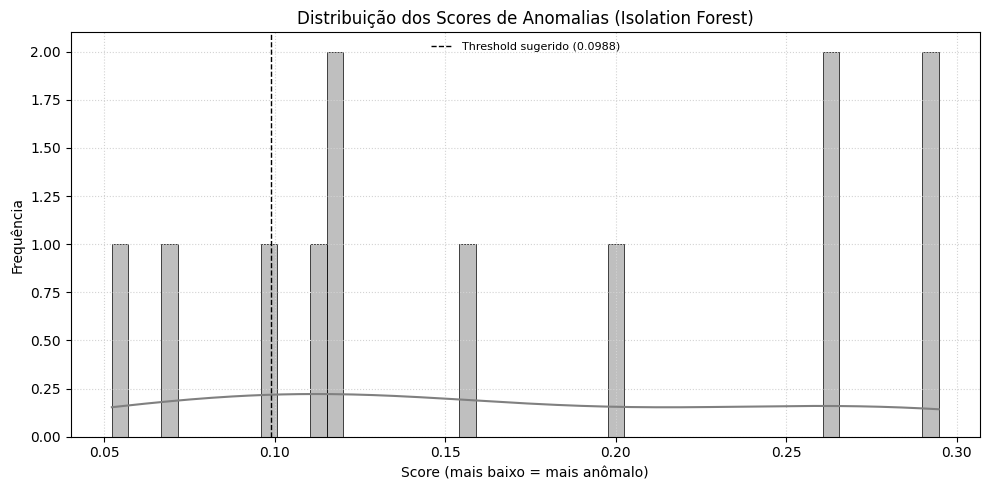

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import IsolationForest

# 1. Treinar o modelo
model = IsolationForest(contamination=0.01, random_state=42)
model.fit(X_real)


# 3. Plotar distribuição - Estilo Monocromático (IEEE)

plt.figure(figsize=(10, 5))

# Histograma em escala de cinza
sns.histplot(scores, bins=50, kde=True, color='gray', edgecolor='black', linewidth=0.5)

# Linha do threshold: preta, pontilhada
plt.axvline(x=best_thresh, color='black', linestyle='--', linewidth=1, label='Threshold sugerido (0.0988)')

# Ajustes IEEE: fontes, estilo minimalista
plt.title("Distribuição dos Scores de Anomalias (Isolation Forest)", fontsize=12)
plt.xlabel("Score (mais baixo = mais anômalo)", fontsize=10)
plt.ylabel("Frequência", fontsize=10)

plt.legend(loc='best', fontsize=8, frameon=False)
plt.grid(True, linestyle=':', color='lightgray')

plt.tight_layout()

# Salvar figura com alta resolução e em padrão monocromático
plt.savefig('distribuicao_scores_gray.png', dpi=600, bbox_inches='tight')

# Salvar o gráfico
output_path = "/content/drive/MyDrive/fraudes-financeiras-isolation-forest/score.png"
plt.show()
plt.close()

plt.show()


In [ ]:
##df_real['y_pred_custom'] = [-1 if s < -0.1 else 1 for s in df_real['score']]
y_pred_custom = np.where(df_real['score'] < -0., -1, 1)
df_real['y_pred_custom'] = y_pred_custom

In [ ]:
threshold =  0.0988
y_pred_custom = np.where(df_real['score'] < threshold, -1, 1)

In [ ]:
df_real['y_pred_custom'] = y_pred_custom


In [ ]:
#Avaliar as métricas com y_pred_custom
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_true = df_real['y_real']
y_pred = df_real['y_pred_custom']

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, pos_label=-1)
rec = recall_score(y_true, y_pred, pos_label=-1)
f1 = f1_score(y_true, y_pred, pos_label=-1)
cm = confusion_matrix(y_true, y_pred)

print("🔁 Avaliação após threshold personalizado")
print(f"Acurácia     : {acc:.4f}")
print(f"Precisão     : {prec:.4f}")
print(f"Recall       : {rec:.4f}")
print(f"F1-score     : {f1:.4f}")
print("\n📄 Relatório de Classificação:")
print(classification_report(y_true, y_pred, target_names=["Normal", "Anomalia"], labels=[1, -1]))


🔁 Avaliação após threshold personalizado
Acurácia     : 0.6667
Precisão     : 0.6667
Recall       : 0.4000
F1-score     : 0.5000

📄 Relatório de Classificação:
              precision    recall  f1-score   support

      Normal       0.67      0.86      0.75         7
    Anomalia       0.67      0.40      0.50         5

    accuracy                           0.67        12
   macro avg       0.67      0.63      0.62        12
weighted avg       0.67      0.67      0.65        12



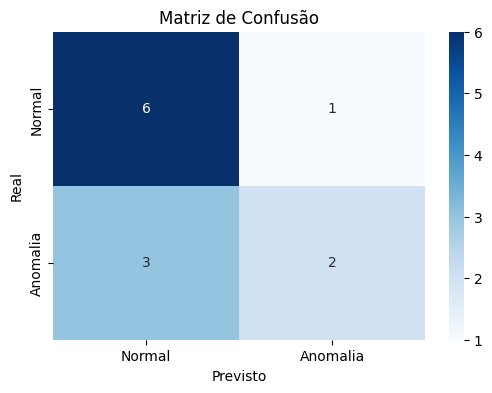

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# y_true: rótulos reais (-1 ou 1)
# y_pred_custom: predições do modelo usando o threshold ajustado

cm = confusion_matrix(y_true, y_pred,labels=[1, -1])  # 1=normal, -1=anomalia

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Anomalia'], yticklabels=['Normal', 'Anomalia'])
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()
